In [1]:
import numpy as np
import pandas as pd
import matplotlib
matplotlib.rcParams['text.usetex'] = True
import matplotlib.pyplot as plt
import json

plt.rcParams['text.usetex'] = True
plt.rcParams['font.size'] = 12
plt.rcParams['axes.linewidth'] = 1.5
plt.rcParams["figure.figsize"] = (9,6)

In [34]:
percentage_weights = []
for levl in range(0, 27):
    file_path = '../open_lth_data/lottery_a36edb229aed327b8e25e0685c350491/replicate_1/level_'+str(levl)+'/main/sparsity_report.json'
    with open(file_path) as fp:
        data = json.load(fp)
    percentage_weights.append(round(100 * data['unpruned'] / data['total'], 2))

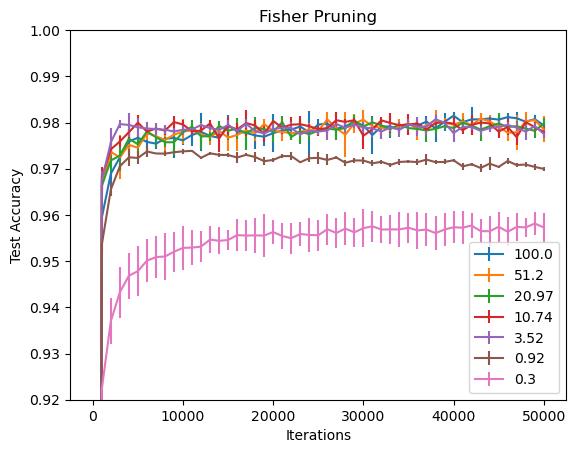

In [43]:
import matplotlib as mpl
mpl.rcParams.update(mpl.rcParamsDefault)
import matplotlib.pyplot as plt

fig, ax = plt.subplots()

x = np.arange(0,51,1)*1000
x_labels = [100, 51.2, 20.97, 10.74, 3.52, 0.92, 0.3]

for label in x_labels:
    levl = percentage_weights.index(label)
    col = percentage_weights[levl]
    df_rep = []
    for repl in range(1,4):
        my_data = pd.read_csv('../open_lth_data/lottery_a36edb229aed327b8e25e0685c350491/replicate_' + str(repl) + '/level_'+str(levl)+'/main/logger', header=None)
        my_data.columns = ['a', 'b', col]
        test_accuracies = my_data[my_data.a=='test_accuracy']
        df_rep.append(test_accuracies[col])

    df = pd.concat(df_rep, axis=1)

    ax.errorbar(x, df.mean(axis=1), df.std(axis=1), label=str(col))

ax.set_title("Fisher Pruning")
ax.set_xlabel("Iterations")
ax.set_ylabel("Test Accuracy")
#ax.grid()
ax.set_ylim(0.92,1)
ax.legend()

plt.show()

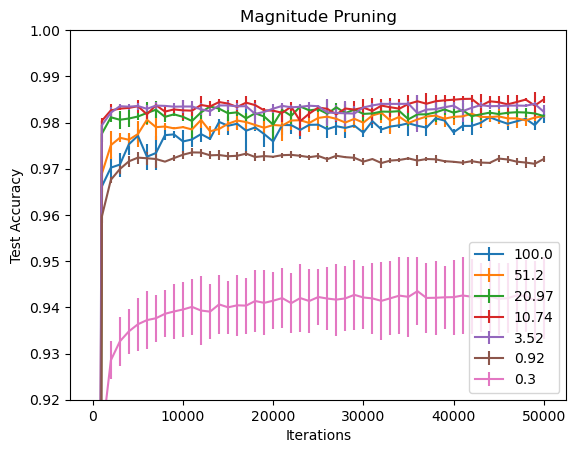

In [42]:
import matplotlib as mpl
mpl.rcParams.update(mpl.rcParamsDefault)
import matplotlib.pyplot as plt

fig, ax = plt.subplots()

x = np.arange(0,51,1)*1000
x_labels = [100, 51.2, 20.97, 10.74, 3.52, 0.92, 0.3]

for label in x_labels:
    levl = percentage_weights.index(label)
    col = percentage_weights[levl]
    df_rep = []
    for repl in range(1,4):
        my_data = pd.read_csv('../open_lth_data/lottery_2f4be23b7e4c30fb5fbf086d41cfacb7/replicate_' + str(repl) + '/level_'+str(levl)+'/main/logger', header=None)
        my_data.columns = ['a', 'b', col]
        test_accuracies = my_data[my_data.a=='test_accuracy']
        df_rep.append(test_accuracies[col])

    df = pd.concat(df_rep, axis=1)

    ax.errorbar(x, df.mean(axis=1), df.std(axis=1), label=str(col))

ax.set_title("Magnitude Pruning")
ax.set_xlabel("Iterations")
ax.set_ylabel("Test Accuracy")
#ax.grid()
ax.set_ylim(0.92,1)
ax.legend()

plt.show()